# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import requests
import tweepy
import pylab

%matplotlib inline

In [2]:
twitter_archive_enhanced = pd.read_csv("./twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_predictions.tsv", mode="wb") as file:
    file.write(response.content)
    
#Import the tweet image predictions TSV file into a DataFrame
image_prediction = pd.read_csv("image_predictions.tsv", sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
twitter_list = []

for line in open("./tweet_json.txt", "r"):
    twitter_data = json.loads(line)
    twitter_list.append({"tweet_id": twitter_data["id_str"],
                        "retweet_count": twitter_data["retweet_count"],
                        "favorite_count": twitter_data["favorite_count"],
                        "followers_count": twitter_data["user"]["followers_count"]})

twitter_data = pd.DataFrame(twitter_list, columns = ["tweet_id", "retweet_count", "favorite_count", "followers_count"])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
twitter_archive_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
twitter_data.head(5)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [8]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive_enhanced["name"].duplicated().sum()

1399

In [10]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [12]:
def null_value(file):
    file_count = file.index.max()
    sum_v = 0
    for i, v in file.isnull().sum().items():
        if v != 0:
            print(i, "has null value and the ratio of null values is", str("{:.2f}".format(v/file_count*100)) + "%")
            sum_v += v

    if sum_v == 0:
        print("No null value")
        
def outlier_value(file):
    flag = 0
    
    for i in file:
        if (file[i].dtype == "int64" or file[i].dtype == "float64") and "id" not in i:
            des = file[i].describe()
            IQR = des["75%"] - des["25%"]
            min_value = des["25%"] - 1.5 * IQR
            max_value = des["75%"] + 1.5 * IQR
            if des["min"] < min_value:
                print(i, "has an outlier, its minimum value is", des["min"], ", which is out of range [", min_value, ",", max_value, "].")
                flag += 1

            if des["max"] > max_value:
                print(i, "has an outlier, its maximum value is", des["max"], ", which is out of range [", min_value, ",", max_value, "].")
                flag += 1
    
    if flag == 0:
        print("No outlier")

def duplicate_value(file):
    for i in file:
        if file[i].duplicated().sum() != 0:
            print("Duplicate exist in", i)

def file_value(file, filename):
    print("File Rows         ----->")
    file_count = file.index.max()
    print(filename,"has", file_count, "rows.")
    print("Null Value        ----->")
    null_value(file)

    print("Duplicate         ----->")
    duplicate_value(file)
    
    print("Outliers          ----->")
    outlier_value(file)

In [13]:
print("==============================   Twitter Archive Enhanced   ==============================")
file_value(twitter_archive_enhanced, "Twitter Archive Enhanced")
print("")
print("==================================   Image Prediction   ==================================")
file_value(image_prediction, "Image Prediction")
print("")
print("====================================   Twitter Data   ====================================")
file_value(twitter_data, "Twitter Data")

==============================   Twitter Archive Enhanced   ==============================
File Rows         ----->
Twitter Archive Enhanced has 2355 rows.
Null Value        ----->
in_reply_to_status_id has null value and the ratio of null values is 96.73%
in_reply_to_user_id has null value and the ratio of null values is 96.73%
retweeted_status_id has null value and the ratio of null values is 92.36%
retweeted_status_user_id has null value and the ratio of null values is 92.36%
retweeted_status_timestamp has null value and the ratio of null values is 92.36%
expanded_urls has null value and the ratio of null values is 2.51%
Duplicate         ----->
Duplicate exist in in_reply_to_status_id
Duplicate exist in in_reply_to_user_id
Duplicate exist in source
Duplicate exist in retweeted_status_id
Duplicate exist in retweeted_status_user_id
Duplicate exist in retweeted_status_timestamp
Duplicate exist in expanded_urls
Duplicate exist in rating_numerator
Duplicate exist in rating_denominator
D

### Quality issues
1. All Ids shoulds be strings (object) instead of float.


2. These fields have too few valid values:
    - in_reply_to_status_id has null value and the ratio of null values is 96.73%
    - in_reply_to_user_id has null value and the ratio of null values is 96.73%
    - retweeted_status_id has null value and the ratio of null values is 92.36%
    - retweeted_status_user_id has null value and the ratio of null values is 92.36%
    - retweeted_status_timestamp has null value and the ratio of null values is 92.36%


3. All tables have different amounts of data:
    - Twitter Archive Enhanced has 2355 rows.
    - Image Prediction has 2074 rows.
    - Twitter Data has 2353 rows.


4. These fields have qutliers:
    - rating_numerator has an outlier, its minimum value is 0.0 , which is out of range [ 7.0 , 15.0 ].
    - rating_numerator has an outlier, its maximum value is 1776.0 , which is out of range [ 7.0 , 15.0 ].
    - rating_denominator has an outlier, its minimum value is 0.0 , which is out of range [ 10.0 , 10.0 ].
    - rating_denominator has an outlier, its maximum value is 170.0 , which is out of range [ 10.0 , 10.0 ].
    - img_num has an outlier, its maximum value is 4.0 , which is out of range [ 1.0 , 1.0 ].
    - p2_conf has an outlier, its maximum value is 0.488014 , which is out of range [ -0.15863262499999994 , 0.4080843749999999 ].
    - p3_conf has an outlier, its maximum value is 0.273419 , which is out of range [ -0.09715532500000001 , 0.205185275 ].


5. There shouldn't be two or more values on one entity from "doggo", "floofer", "pupper" and "puppo",
as the values are exclusive.


6. Source column is in HTML-formatted string, not a normal string.

### Tidiness issues
1. The archive data, image data and Twitter data should be in the same table.


2. "doggo", "floofer", "pupper" and "puppo" should be in one column representing different
dog periods.


3. "year-month" should be extracted from timestamp to use as individual values.


4. Duplicated posts as "We only rate dogs" which are warning posts that are irrelevant to our research.


5. Urls are not helpful for analysis.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_prediction_clean = image_prediction.copy()
twitter_data_clean = twitter_data.copy()

### Issue #1: All Ids shoulds be strings (object) instead of float

#### Define: Convert all Ids from float to string

#### Code

In [15]:
def changeToStr(file):
    for i in file:
        if "id" in i:
            file[i] = file[i].apply(str)
        
changeToStr(twitter_archive_enhanced_clean)
changeToStr(image_prediction_clean)
changeToStr(twitter_data_clean)

#### Test

In [16]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       2356 non-null   object
 2   in_reply_to_user_id         2356 non-null   object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         2356 non-null   object
 7   retweeted_status_user_id    2356 non-null   object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

In [17]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [18]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Issue #2: These fields have too few valid values:
- in_reply_to_status_id has null value and the ratio of null values is 96.73%
- in_reply_to_user_id has null value and the ratio of null values is 96.73%
- retweeted_status_id has null value and the ratio of null values is 92.36%
- retweeted_status_user_id has null value and the ratio of null values is 92.36%
- retweeted_status_timestamp has null value and the ratio of null values is 92.36%

#### Define: Delete these columns that have no valid values

#### Code

In [19]:
del twitter_archive_enhanced_clean["in_reply_to_status_id"]
del twitter_archive_enhanced_clean["in_reply_to_user_id"]
del twitter_archive_enhanced_clean["retweeted_status_id"]
del twitter_archive_enhanced_clean["retweeted_status_user_id"]
del twitter_archive_enhanced_clean["retweeted_status_timestamp"]

#### Test

In [20]:
print("==============================   Twitter Archive Enhanced   ==============================")
null_value(twitter_archive_enhanced_clean)
print("")
print("==================================   Image Prediction   ==================================")
null_value(image_prediction_clean)
print("")
print("====================================   Twitter Data   ====================================")
null_value(twitter_data_clean)

==============================   Twitter Archive Enhanced   ==============================
expanded_urls has null value and the ratio of null values is 2.51%

==================================   Image Prediction   ==================================
No null value

====================================   Twitter Data   ====================================
No null value


### Issue #3: These fields have qutliers:
- rating_numerator has an outlier, its minimum value is 0.0 , which is out of range [ 7.0 , 15.0 ].
- rating_numerator has an outlier, its maximum value is 1776.0 , which is out of range [ 7.0 , 15.0 ].
- rating_denominator has an outlier, its minimum value is 0.0 , which is out of range [ 10.0 , 10.0 ].
- rating_denominator has an outlier, its maximum value is 170.0 , which is out of range [ 10.0 , 10.0 ].
- img_num has an outlier, its maximum value is 4.0 , which is out of range [ 1.0 , 1.0 ].
- p2_conf has an outlier, its maximum value is 0.488014 , which is out of range [ -0.15863262499999994 , 0.4080843749999999 ].
- p3_conf has an outlier, its maximum value is 0.273419 , which is out of range [ -0.09715532500000001 , 0.205185275 ].

#### Define: Delete these columns that have no valid values

#### Code

In [21]:
def delete_outlier(file):
    file_in_scope = file
    
    for i in file:
        if (file[i].dtype == "int64" or file[i].dtype == "float64") and "id" not in i:
            des = file[i].describe()
            IQR = des["75%"] - des["25%"]
            min_value = des["25%"] - 1.5 * IQR
            max_value = des["75%"] + 1.5 * IQR
            file_in_scope = file_in_scope[(file_in_scope[i] >= min_value) & (file_in_scope[i] <= max_value)]
    
    return file_in_scope

In [22]:
twitter_archive_enhanced_clean = delete_outlier(twitter_archive_enhanced_clean)
image_prediction_clean = delete_outlier(image_prediction_clean)

#### Test

In [23]:
print("==============================   Twitter Archive Enhanced   ==============================")
outlier_value(twitter_archive_enhanced_clean)
print("")
print("==================================   Image Prediction   ==================================")
outlier_value(image_prediction_clean)
print("")
print("====================================   Twitter Data   ====================================")
outlier_value(twitter_data_clean)
print("But it seems not the outlier.")

==============================   Twitter Archive Enhanced   ==============================
No outlier

==================================   Image Prediction   ==================================
No outlier

====================================   Twitter Data   ====================================
retweet_count has an outlier, its maximum value is 79515.0 , which is out of range [ -3916.75 , 8193.25 ].
favorite_count has an outlier, its maximum value is 132810.0 , which is out of range [ -11645.875 , 23183.125 ].
followers_count has an outlier, its minimum value is 3200799.0 , which is out of range [ 3200815.5 , 3201035.5 ].
But it seems not the outlier.


### Issue #4: Source column is in HTML-formatted string, not a normal string

#### Define: Reformat it

#### Code

In [24]:
twitter_archive_enhanced_clean["source"] = twitter_archive_enhanced_clean["source"].str.extract(">([\w\W\s]*)<", expand=True)

#### Test

In [25]:
twitter_archive_enhanced_clean["source"].value_counts()

Twitter for iPhone     2070
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

### Issue #5:
- There shouldn't be two or more values on one entity from "doggo", "floofer", "pupper" and "puppo",
as the values are exclusive.
- "doggo", "floofer", "pupper" and "puppo" should be in one column representing different dog periods.

#### Define: Merge these columns into one column "type" and delete them

#### Code

In [26]:
condions = [ (twitter_archive_enhanced_clean["doggo"] != "None"), (twitter_archive_enhanced_clean["floofer"] != "None"), (twitter_archive_enhanced_clean["pupper"] != "None"), (twitter_archive_enhanced_clean["puppo"] != "None"), ((twitter_archive_enhanced_clean["puppo"] == "None") & (twitter_archive_enhanced_clean["floofer"] == "None") & (twitter_archive_enhanced_clean["pupper"] == "None") & (twitter_archive_enhanced_clean["puppo"] == "None"))]

values = [ twitter_archive_enhanced_clean["doggo"], twitter_archive_enhanced_clean["floofer"], twitter_archive_enhanced_clean["pupper"], twitter_archive_enhanced_clean["puppo"], "None"]

twitter_archive_enhanced_clean["type"] = np.select(condions,values)

del twitter_archive_enhanced_clean["doggo"]
del twitter_archive_enhanced_clean["floofer"]
del twitter_archive_enhanced_clean["pupper"]
del twitter_archive_enhanced_clean["puppo"]

#### Test

In [27]:
twitter_archive_enhanced_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None


### Issue #6: "year-month" should be extracted from timestamp to use as individual values.

#### Define: Extract year-month from timestamp

#### Code

In [28]:
twitter_archive_enhanced_clean["timestamp"] = pd.to_datetime(twitter_archive_enhanced_clean["timestamp"])
twitter_archive_enhanced_clean["yearmonth"] = twitter_archive_enhanced_clean["timestamp"].dt.to_period("M")

#### Test

In [29]:
twitter_archive_enhanced_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,yearmonth
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,2017-08


### Issue #7: Duplicated posts as "We only rate dogs" which are warning posts that are irrelevant to our research.

#### Define: Delete these lines

#### Code

In [30]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean["text"].str.contains("We only rate dogs") == False]

#### Test

In [31]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean["text"].str.contains("We only rate dogs")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,yearmonth


### Issue #8: Urls are not helpful for analysis.

#### Define: Delete these column

#### Code

In [32]:
def delete_url_column(file):
    for i in file:
        if "url" in i:
            print("Delete column:",i)
            del file[i]

In [33]:
print("==============================   Twitter Archive Enhanced   ==============================")
delete_url_column(twitter_archive_enhanced_clean)
print("")
print("==================================   Image Prediction   ==================================")
delete_url_column(image_prediction_clean)
print("")
print("====================================   Twitter Data   ====================================")
delete_url_column(twitter_data_clean)

==============================   Twitter Archive Enhanced   ==============================
Delete column: expanded_urls

==================================   Image Prediction   ==================================
Delete column: jpg_url

====================================   Twitter Data   ====================================


#### Test

In [34]:
twitter_archive_enhanced_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,type,yearmonth
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,2017-08


In [35]:
image_prediction_clean.head(1)

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [36]:
twitter_data_clean.head(1)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889


### Issue #9:
- All tables have different amounts of data:
    - Twitter Archive Enhanced has 2355 rows.
    - Image Prediction has 2074 rows.
    - Twitter Data has 2353 rows.
- The archive data, image data and Twitter data should be in the same table.

#### Define: Inner Join the three tables into one. Using archive as master table and tweet_id as key.

#### Code

In [37]:
twitter_archive_master = pd.merge(twitter_archive_enhanced_clean, image_prediction_clean, on="tweet_id", how="inner")
twitter_archive_master = pd.merge(twitter_archive_master, twitter_data_clean, on="tweet_id", how="inner")

#### Test

In [38]:
twitter_archive_master.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,type,yearmonth,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,2017-08,1,...,False,bagel,0.085851,False,banana,0.07611,False,8853,39467,3200889


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Users use three ways to access Twitter, Twitter for iPhone, Twitter web client and TweetDeck. Of these users, 97.76% are using Twitter for iPhone.


2. Retweets by day peaked sometime in June 2016 and has never exceeded 60,000 in a single day since, with a lower average. Retweets by month peaked in December 2015 and trough was in April 2016, and the total is significantly higher in winter than in summer each year.


3. If you favorite a tweet, there is about an 80% chance that you will also retweet that tweet.

### Visualization

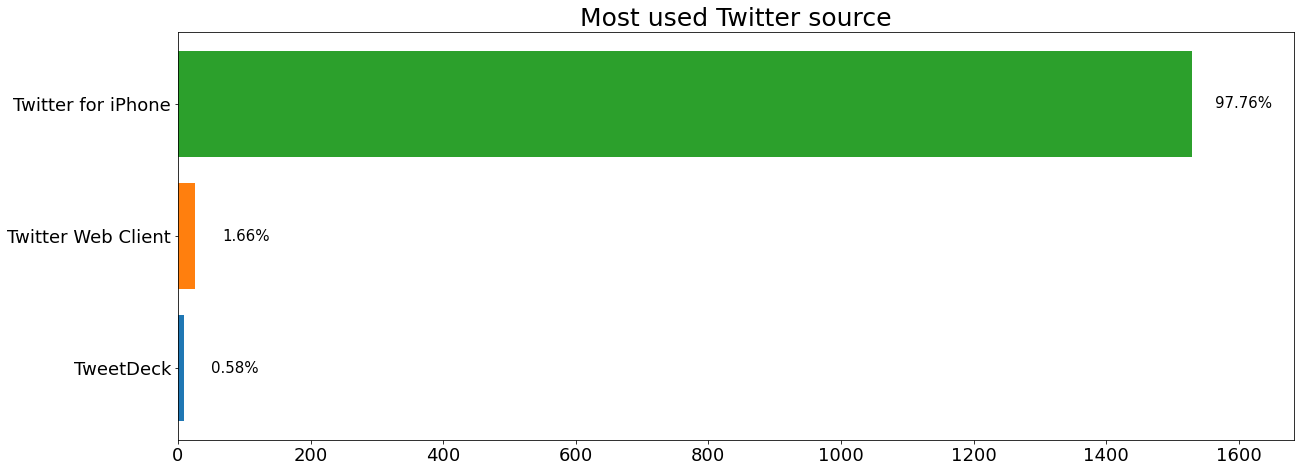

Users use three ways to access Twitter, Twitter for iPhone, Twitter web client and TweetDeck. Of these users, 97.76% are using Twitter for iPhone.


In [40]:
source = twitter_archive_master["source"].value_counts().sort_values()

plt.subplots(figsize=(20, 7.5))

plt.title("Most used Twitter source", fontsize=25)
plt.tick_params(labelsize=18)
plt.xlim(xmax = (source.max() * 1.1))

for i in source.index:
    plt.barh(i, source[i], label=i)

count = 0
sum_source = source.sum()
for i in source.index:
    source_percent = str("{:.2f}".format(source[i] / sum_source * 100)) + "%"
    plt.text(source[i] + source.max() * 0.05, count, source_percent, ha="center", va="center", fontsize=15)
    count+=1

plt.show()

print("Users use three ways to access Twitter, Twitter for iPhone, Twitter web client and TweetDeck. Of these users, 97.76% are using Twitter for iPhone.")

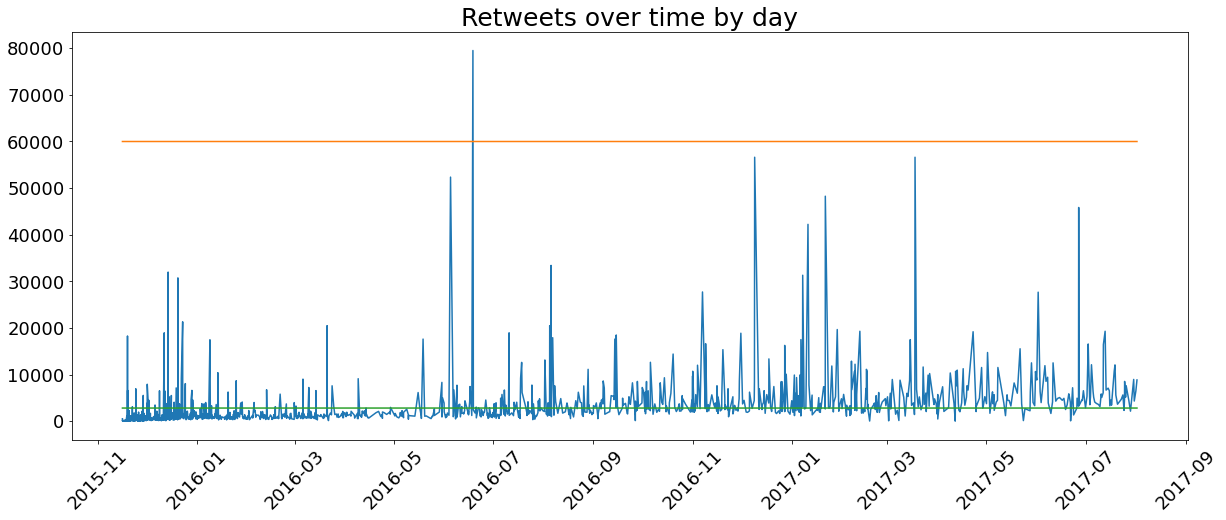

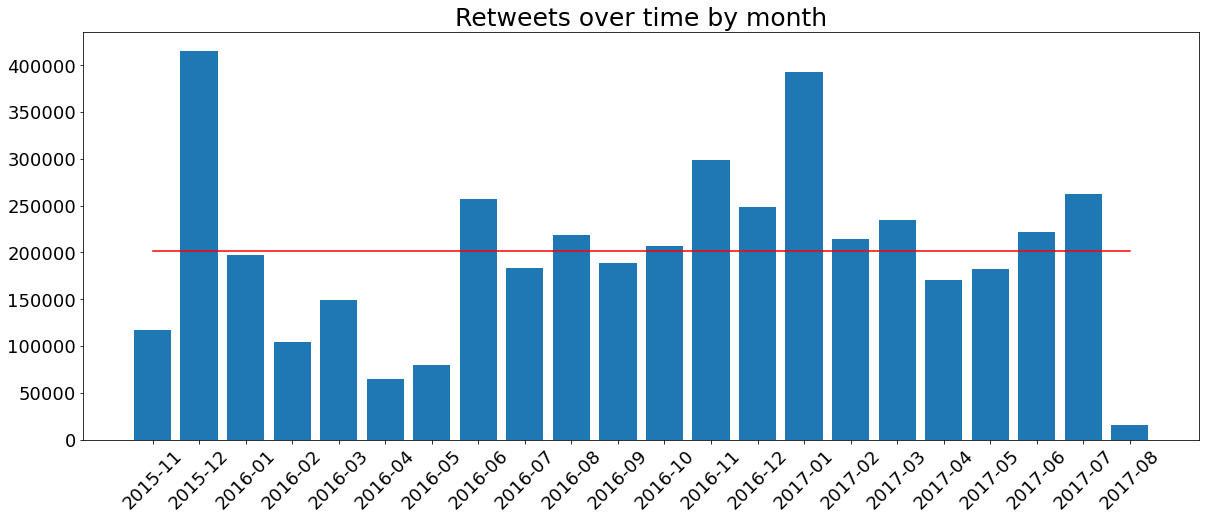

Retweets by day peaked sometime in June 2016 and has never exceeded 60,000 in a single day since, with a lower average.
Retweets by month peaked in December 2015 and trough was in April 2016, and the total is significantly higher in winter than in summer each year.
(The data starts on November 15, 2015 and ends on August 1, 2017, so November 2015 and August 2017 are not included in the reference range.)


In [41]:
highest_value = twitter_archive_master["retweet_count"] * 0 + 60000
avg_value = twitter_archive_master["retweet_count"] * 0 + twitter_archive_master["retweet_count"].mean()

plt.subplots(figsize=(20, 7.5))

plt.title("Retweets over time by day", fontsize=25)
plt.tick_params(labelsize=18)
plt.plot(twitter_archive_master["timestamp"], twitter_archive_master["retweet_count"])
plt.plot(twitter_archive_master["timestamp"], highest_value)
plt.plot(twitter_archive_master["timestamp"], avg_value)
plt.xticks(rotation=45)

plt.show()

groupby_timestamp = twitter_archive_master.groupby("yearmonth")["retweet_count"].agg("sum")

mean_retweet = groupby_timestamp.values * 0 + groupby_timestamp.values.mean()

plt.subplots(figsize=(20, 7.5))

plt.title("Retweets over time by month", fontsize=25)
plt.tick_params(labelsize=18)
plt.bar(groupby_timestamp.index.astype(str).tolist(), groupby_timestamp.values.tolist())
plt.plot(groupby_timestamp.index.astype(str).tolist(), mean_retweet, color="red")
plt.xticks(rotation=45)

plt.show()

print("Retweets by day peaked sometime in June 2016 and has never exceeded 60,000 in a single day since, with a lower average.")
print("Retweets by month peaked in December 2015 and trough was in April 2016, and the total is significantly higher in winter than in summer each year.")
print("(The data starts on November 15, 2015 and ends on August 1, 2017, so November 2015 and August 2017 are not included in the reference range.)")

In [42]:
def scatter_with_line(x, y):
    pylab.plot(x,y,"o")
    z = np.polyfit(x, y, 1) 
    p = np.poly1d(z) 
    pylab.plot(x,p(x)) 
    
    return p

corr = twitter_archive_master["favorite_count"].corr(twitter_archive_master["retweet_count"])

plt.subplots(figsize=(20, 7.5))
plt.title("Favorite and Retweet", fontsize=25)
a = scatter_with_line(twitter_archive_master["favorite_count"], twitter_archive_master["retweet_count"])

plt.xlabel("Favorite", fontsize=18)
plt.ylabel("Retweet", fontsize=18)

plt.text(twitter_archive_master["favorite_count"].max() * 0.9, a(twitter_archive_master["favorite_count"].max() * 0.9), "Corr = " + str(round(corr, 4)), fontsize=18)
plt.show()

print("The corr of 0.8003 indicates a positive correlation between the number of favorite and retweet. If you favorite a tweet, there is about an 80% chance that you will also retweet that tweet.")

KeyboardInterrupt: 

In [ ]:
twitter_archive_master.info()